In [168]:
import numpy as np
import pandas as pd

In [170]:
merged_data = pd.read_csv('merged_data.csv')

In [171]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,Month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03


In [172]:
segmentation = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductID': 'nunique'
}).reset_index()

In [174]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
segmentation[['TotalValue', 'Quantity', 'ProductID']] = scaler.fit_transform(segmentation[['TotalValue', 'Quantity', 'ProductID']])

In [176]:
segmentation.head()

,CustomerID,TotalValue,Quantity,ProductID
0,C0001,0.308942,0.354839,0.444444
1,C0002,0.168095,0.290323,0.333333
2,C0003,0.249541,0.419355,0.333333
3,C0004,0.497806,0.709677,0.777778
4,C0005,0.184287,0.193548,0.222222


In [181]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
segmentation['Cluster'] = kmeans.fit_predict(segmentation[['TotalValue', 'Quantity', 'ProductID']])

In [182]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(segmentation[['TotalValue', 'Quantity', 'ProductID']], segmentation['Cluster'])
db_index

np.float64(0.8454710003865147)

In [184]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
segmentation['PCA1'], segmentation['PCA2'] = pca.fit_transform(segmentation[['TotalValue', 'Quantity', 'ProductID']]).T

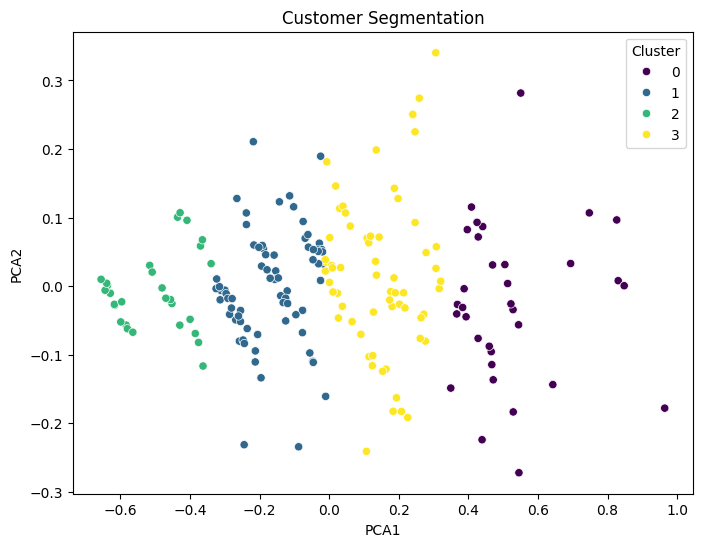

In [186]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=segmentation
)
plt.title('Customer Segmentation')
plt.show()

In [188]:
segmentation.to_csv("Vamsi_Renumala_Clustering.csv", index=False)